<a href="https://colab.research.google.com/github/ikwanpras/Text-Mining-Sentiment-Analysis-/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_excel("//content/klasifikasi_sentimen_k1 (2).xlsx")
data

,klasifikasi_sentimen,bulan,full_text,Sentimen,clean_teks
0,Negatif,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,Negatif,ketua pgri irnes jakli kurikulum merdeka guru ...
1,Negatif,November,kdg bingung mau ikut materi yg dikasi guru ata...,Negatif,terkadang bingung materi kasih guru materi kur...
2,Negatif,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,Negatif,gaharus bersalaaaahhbb gwww duh kurikulum merd...
3,Negatif,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,Negatif,kurikulum merdeka jalan riweh pas pat cmn beba...
4,Negatif,November,aku gatau lagi sama menteri pendidikan yang ng...,Negatif,tau menteri didik ada kurikulum merdeka jujur ...
...,...,...,...,...,...
4339,Positif,April,@Bali_Football @Sport77Official hmm.. jadi dul...,Positif,bal football sportofficial hmm tuju bilang ika...
4340,Positif,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,Positif,perintah panjang daftar kurikulum merdeka
4341,Positif,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,Positif,perintah panjang daftar kurikulum merdeka
4342,Positif,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,Positif,perintah panjang daftar kurikulum merdeka


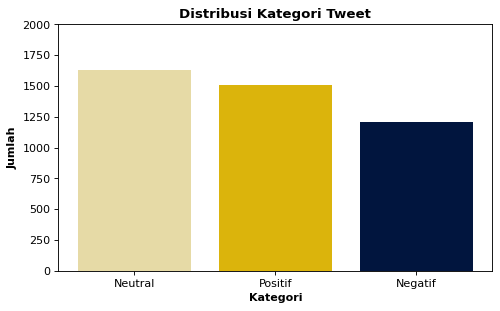

In [9]:
import matplotlib.pyplot as plt
height = data['klasifikasi_sentimen'].value_counts()
labels = height.keys()
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,2000)
plt.title('Distribusi Kategori Tweet', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['#E6DAA6','#DBB40C','#01153E'])
plt.xticks(y_pos, labels)
plt.show()

<Axes: xlabel='bulan', ylabel='count'>

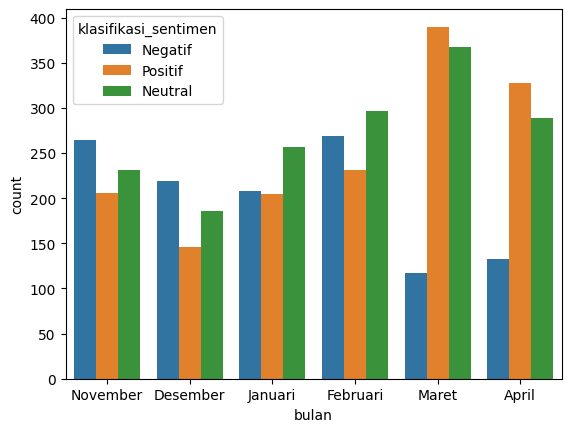

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="bulan", hue="klasifikasi_sentimen", data=data)

In [11]:
!wget https://drive.google.com/file/d/158vddP2x1H2dV9eVoPbjKJIgAH-eCXv1/view?usp=share_link

--2023-12-27 15:16:00--  https://drive.google.com/file/d/158vddP2x1H2dV9eVoPbjKJIgAH-eCXv1/view?usp=share_link
Resolving drive.google.com (drive.google.com)... 108.177.127.139, 108.177.127.113, 108.177.127.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.google.com/sorry/index?continue=https://drive.google.com/file/d/158vddP2x1H2dV9eVoPbjKJIgAH-eCXv1/view%3Fusp%3Dshare_link&q=EgQiIO0uGLD_sKwGIjCZISWxLaKPoiec2M2WkW1bpxzZMJvsh12581paD_OUUZF6ehFiIbQXKDCfvITa3l4yAXJaAUM [following]
--2023-12-27 15:16:01--  https://www.google.com/sorry/index?continue=https://drive.google.com/file/d/158vddP2x1H2dV9eVoPbjKJIgAH-eCXv1/view%3Fusp%3Dshare_link&q=EgQiIO0uGLD_sKwGIjCZISWxLaKPoiec2M2WkW1bpxzZMJvsh12581paD_OUUZF6ehFiIbQXKDCfvITa3l4yAXJaAUM
Resolving www.google.com (www.google.com)... 108.177.119.147, 108.177.119.103, 108.177.119.106, ...
Connecting to www.google.com (www.google.com)|1

In [12]:
import imageio
import cv2
from PIL import Image
mask = imageio.imread('/content/Unknown-11.png')

<ipython-input-12-156164b8a5d6>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread('/content/Unknown-11.png')


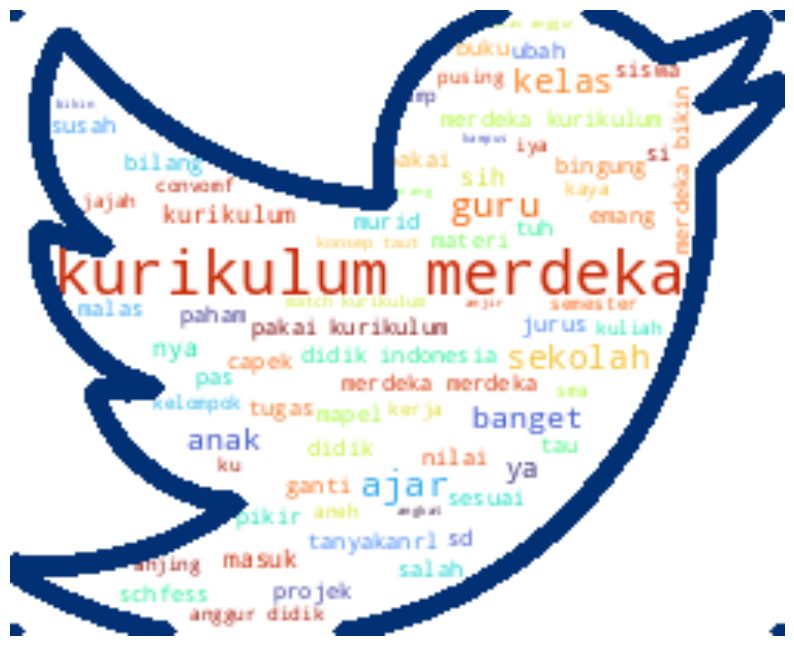

In [13]:
#cloud neg
from wordcloud import WordCloud
word_neg = data[data.klasifikasi_sentimen == 'Negatif']
negatif_string = []

for t in word_neg.clean_teks:
    negatif_string.append(t)

negatif_string = pd.Series(negatif_string).str.cat(sep=' ')

wordcloud = WordCloud(background_color='white',
                      max_words=70,
                      max_font_size=5000,
                      mask=mask,contour_color='#023075',
                      contour_width=10,colormap='turbo').generate(negatif_string)

# create image as cloud
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("cloud.png", format="png")
plt.show()

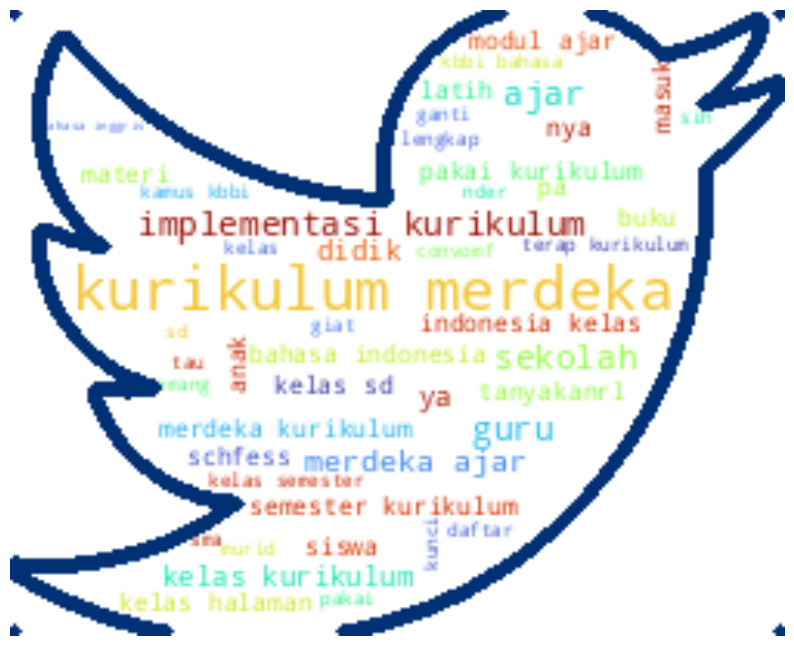

In [15]:
#cloud neutral
from wordcloud import WordCloud
word_net = data[data.klasifikasi_sentimen == 'Neutral']
netral_string = []

for t in word_net.clean_teks:
    netral_string.append(t)

netral_string = pd.Series(netral_string).str.cat(sep=' ')

wordcloud = WordCloud(background_color='white',
                      max_words=70,
                      max_font_size=5000,
                      mask=mask,contour_color='#023075',
                      contour_width=5,colormap='turbo').generate(netral_string)

# create image as cloud
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("cloud.png", format="png")
plt.show()

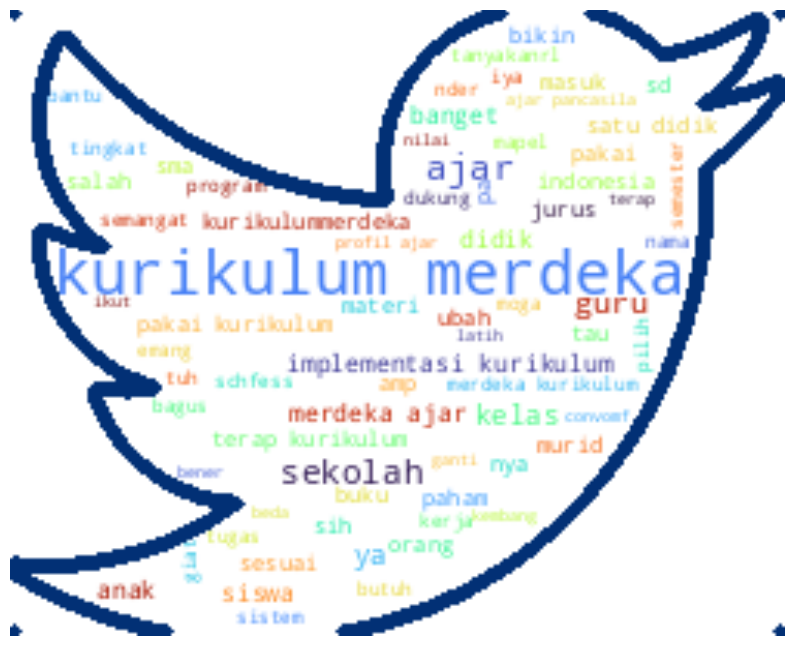

In [16]:
#cloud positif
from wordcloud import WordCloud
word_pos = data[data.klasifikasi_sentimen == 'Positif']
positif_string = []

for t in word_pos.clean_teks:
    positif_string.append(t)

positif_string = pd.Series(positif_string).str.cat(sep=' ')

wordcloud = WordCloud(background_color='white',
                      max_words=70,
                      max_font_size=5000,
                      mask=mask,contour_color='#023075',
                      contour_width=5,colormap='turbo').generate(positif_string)

# create image as cloud
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("cloud.png", format="png")
plt.show()